In [48]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import pi, sqrt, sin, cos

In [49]:
%pylab inline

from lib.decomposer import Eigen_decomp
from lib.Reconstruction_plots import recon_plot

Populating the interactive namespace from numpy and matplotlib


C:\Users\thema\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['step']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [50]:
# function approximation

step = 2 * pi / 365
x = np.arange(0, 2 * pi, step)
len(x)

365

In [51]:
# orthogonal set

c=sqrt(step/(pi))
v=[]
v.append(np.array(cos(0*x))*c/sqrt(2))
v.append(np.array(sin(x))*c)
v.append(np.array(cos(x))*c)
v.append(np.array(sin(2*x))*c)
v.append(np.array(cos(2*x))*c)
v.append(np.array(sin(3*x))*c)
v.append(np.array(cos(3*x))*c)
v.append(np.array(sin(4*x))*c)
v.append(np.array(cos(4*x))*c)

print("v contains %d vectors"%(len(v)))

v contains 9 vectors


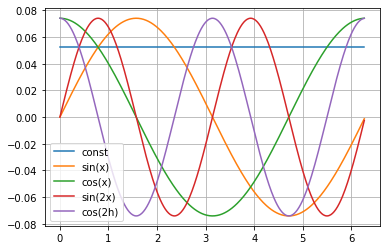

In [52]:
# plot the function graphs

for i in range(5):
    plt.plot(x, v[i])

plt.legend(["const", "sin(x)", "cos(x)", "sin(2x)", "cos(2h)"])
plt.grid()
plt.show()

In [53]:
# check for orthonormal basis

for i in range(len(v)):
    print()
    for j in range(len(v)):
        a = np.dot(v[i], v[j])
        a = np.round(1000 * a + 0.1) / 1000
        print("%1.0f" % a, end=" ")


1 0 0 0 0 0 0 0 0 
0 1 0 0 0 0 0 0 0 
0 0 1 0 0 0 0 0 0 
0 0 0 1 0 0 0 0 0 
0 0 0 0 1 0 0 0 0 
0 0 0 0 0 1 0 0 0 
0 0 0 0 0 0 1 0 0 
0 0 0 0 0 0 0 1 0 
0 0 0 0 0 0 0 0 1 

In [54]:
# rewrite the set of vectors as a matrix

u = np.vstack(v).transpose()
np.shape(u)

(365, 9)

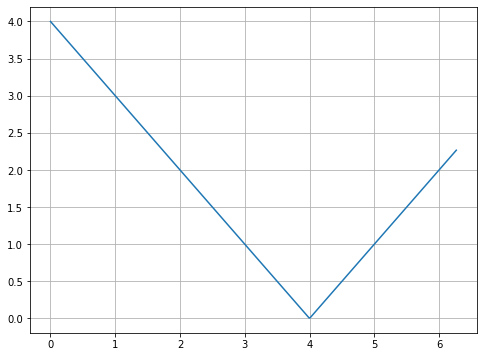

In [55]:
# Approximating an arbitary function

f1 = np.abs(x - 4)

plt.figure(figsize=[8, 6])
plt.plot(x, f1)
plt.grid()
plt.show()

In [56]:
"""
libs :
    |- decomposer.py
            |- eigen_decomp
    |- reconstuction_plots.py
            |- recon_plot
"""

'\nlibs :\n    |- decomposer.py\n            |- eigen_decomp\n    |- reconstuction_plots.py\n            |- recon_plot\n'

C:\Users\thema\Documents\Machine Learning Notebooks\edx-spark practice notebooks\weather_analysis_part_1\lib\Reconstruction_plots.py:111: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()


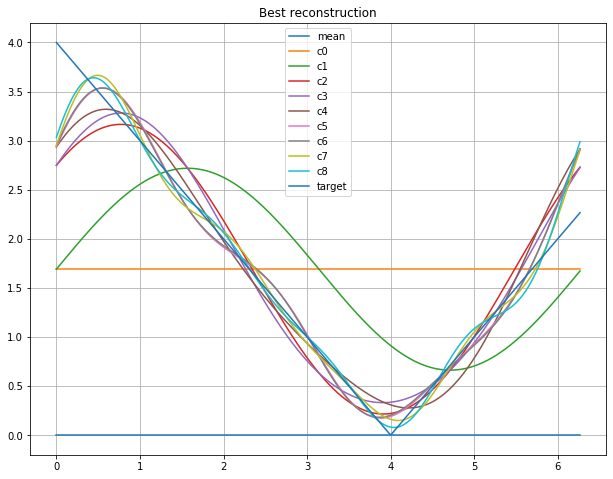

In [57]:
# plotting approximations

eigen_decomp = Eigen_decomp(x, f1, np.zeros(len(x)), u)
recon_plot(eigen_decomp, year_axis=False, Title="Best reconstruction", interactive=False, figsize=[8, 6])

In [58]:
# recovering from noise

noise = np.random.normal(size=x.shape)
f1 = 2*v[1] - 4*v[5]
f2 = f1 + 0.3*noise

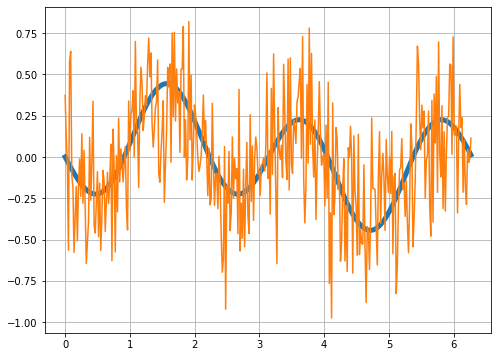

In [59]:
plt.figure(figsize=[8, 6])
plt.plot(x, f1, linewidth=5)
plt.plot(x, f2)
plt.grid()
plt.show()